# Homework 3: Loading, Cleaning, Analyzing, and Visualizing Data with Pandas (and using resources!)

### <p style="text-align: right;"> &#9989; Put your name here </p>

## Learning Goals

* Using pandas to work with data and clean it
* Make meaningful visual representations of the data
* Fitting curves to data and evaluating model fits

___

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, March 28th, 2025** 

It should be uploaded into D2L Homework #3.  Submission instructions can be found at the end of the notebook.

Total possible points: **70**

---
<a id="toc"></a>

## Table of Contents

[Part 0. Academic Integrity Statement](#part_0) (2 points)

[Part 1. Reading, describing, and cleaning data](#part_1)  (28 points)

[Part 2. Exploratory Data Analysis and Data visualization](#part_2)  (18 points)

[Part 3. Fitting curves to data.](#part_3) (22 points)
    

---
<a id="part_0"></a>

## Part 0. Academic integrity statement (2 points)

[Back to Top](#toc)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> *Put your personal academic integrity statement here.*

Before we read in the data and begin working with it, let's import the libraries that we would typically use for this task. You can always come back to this cell and import additional libraries that you need.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

---
<a id="part_1"></a>

## Part 1: Data Reading and Cleaning (28 points total)

[Back to Top](#toc)

Suppose you are interested in modeling the weather of the Great Lakes.  You find some great data in the [Great Lakes Weather Data and Marine Observations](https://apps.glerl.noaa.gov/marobs/)$^{1}$ webpage that has been compiled by the [Great Lakes Environmental Research Laboratory](https://www.glerl.noaa.gov/about/), a lab that operates under NOAA. Let's check it out!



<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-supplemental/main/Homework/great_lakes.png" width= 600>

Image credit: [NOAA GLERL](https://www.glerl.noaa.gov/res/Programs/ipemf/GLCFS_nextgen.html)


The data contains realtime marine data from Great Lakes buoys, coastal met stations, airports, and ships. Marine observations include wind speed, wind gust, wind direction, air temperature, dew point, cloud cover, sea level pressure, water temperature, wave height, wave period, and live tracking of Great Lakes ship locations.

Variables are descibed as follows:

| Variable name   |    stands for            |    description /unit of measurement         |  
|:---------------:|:------------------------:|--------------------------------| 
| id              | Observation Identifier   | includes 'year', 'day', 'hour', 'minute', 'station type', 'station id' and 'lake'|
| data_format     | data format              | 9 = Lake Meteorological Data (LMD) Format| 
| air_temp        | Air temperature          | degrees Centigrade             | 
| dew_point          | Dew point                | degrees Centigrade             | 
| wind_direction        | Wind direction           | degrees from, 0=north, 90=east | 
| wind_speed        | Wind speed               | meters/second                  |
| max_gust        | Maximum wind gust        | meters/second                  | 
| cloud       | Cloud cover              | percent                        | 
| solar       | Solar Radiation          | watts/meter                    | 
| pressure        | Barometric pressure      | millibars                      |
| water_temp      | Water temperature        | degrees Centigrade             | 
| wave_height         | Significant Wave height  | meters                         | 
| wave_period        | Wave period              |   seconds                             | 
|ship_lat |      North Latitude (ship observation)                 | Decimal degrees                   |                       |
|ship_long  |  West Longitude (ship observation)                  |    Decimal degrees                 |                       |


**(OPTIONAL:)** If you are interested, you may refer to the appendix for information on how this data was scraped from the web. 


$^{1}$NOAA/GLERL. Realtime Great Lakes Weather Data and Marine Observations. https://apps.glerl.noaa.gov/marobs/, accessed March 3rd, 2025.


## Part 1.1 - Looking over the data (2 points)
As you might recall from Day 12, data sometimes comes in formats that you might not be familiar with.  Figuring out how to load in the data in a useful way is one of the most common issues that you will face. With this assignments, you will find two .zip files. `zipped_data_files_part1.zip` contains the files you will need for part 1. If you have not yet had to "unzip" data files before, you will need to use your resources (e.g. Office hours, Google, HiTA, etc.) to find out how! 

In the cell below, try reading in the data from `g202502600.lmd` using `read_csv`.  

In [9]:
# Run this cell!
problem_data = pd.read_csv('g202502600.lmd')
problem_data.head()

202502600001AGCM4   29 999.9 999.9 999 99.9 99.9 999 9999.9 1015.4  0.1 99.9 99.9            
0  202502600001ALXN6   59 999.9 999.9 999 99.9 99...                                           
1  202502600001APNM4   29  -1.2 999.9 260  6.2  7...                                           
2  202502600001BHRI3   19   2.5 999.9 270  5.7  7...                                           
3  202502600001BIGM4   09  -2.4 999.9 330  3.6  7...                                           
4  202502600001BSBM4   19   1.0 999.9 270 16.5 21...

You probably saw that data did not load correctly.  Open the data and take a look at the file.  You might also want to look at the format sheet that is provided on the website: https://apps.glerl.noaa.gov/marobs/docs/data.lmd.fmt. 

#### &#9989;&nbsp; **Task**
**Name at least two things about how the data is formatted that might make it hard for `read_csv` to read in the data.**(2 points)

<font size=8 color="#009600">&#9998;</font> Put your answer here:  

## Part 1.2 Loading Data (5 points)

It appears we might need to use a different tool to read in the data.  Take a look at the tools pandas has available, and read some of the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html.  Is there one that looks like it might be useful in this case?  

#### &#9989;&nbsp; **Task (5 points)**
1. Look at the format sheet that is provided on the website: https://apps.glerl.noaa.gov/marobs/docs/data.lmd.fmt. Observe the format of each variable in the data sets.
   
2. Test out the pandas tool you selected and print the first few rows to make sure it works. Make sure to separate the identifier variable into its different components, and that the columns have appropriate descriptive names!  You should end up with 21 columns in your data frame.
   
*If all goes well, you should get something that looks like this:*

<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-supplemental/main/Homework/5f3ade2e-cdd1-4c95-a5d6-7aad36783d67.png.png" width= 800>

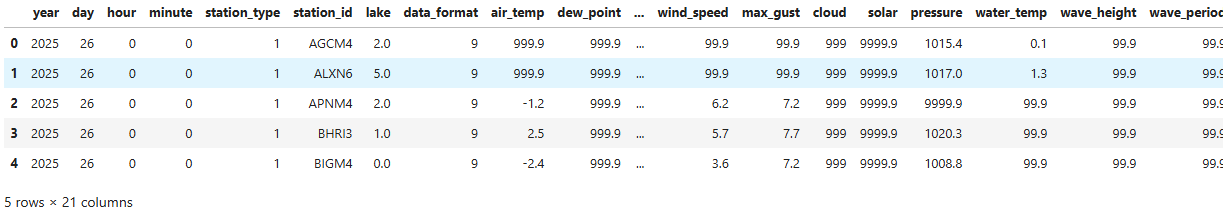

In [20]:
## your code here

## Part 1.3 Loading multiple files (4 points)

Each file only includes data from a single day, which might not be very useful.  It would be much more useful to load in data from multiple days.  This is a very common thing to do in data science.  Fortunately, we can accomplish this in python!

You have been provided with 30 data files, corresponding to daily marine data observations from day 26 to day 57 of the year 2025.

#### &#9989;&nbsp; **Task:** 
Write a `for` loop to load in the data from each of the files and save all of the data into one dataframe.  Display the final dataframe. (4 points)

_Note:_ In each iteration of the loop, you will change the name of the file to be loaded in.  Some example starter code is provided to you to get you started, but you will have to modify it. In this example, the code reads in a series of datasets with file names "Example001.csv", "Example002.csv", "Example003.csv", and so on.

In [23]:
# create an empty dataframe
# this is where all the data will eventually be stored
store_data = pd.DataFrame() 

# create a filename
filenumber = "{:03d}".format(2)
filename = "Example" + filenumber + ".csv"
print(filename)

# load in data to a temporary variable
temp_data = pd.read_csv(filename)

# add data to the storage variable 
store_data = pd.concat([store_data, temp_data])
store_data

Example002.csv


A   B   C   D
0  10   8   3   6
1   4   5   3   8
2  12  15   6   2

### Some data wrangling
Before you proceed, uncomment the cell below and modify the dataframe name `df` as appropriate . Then run the cell, to see the data types in your data frame. Compare this with the data you have displayed above.

In [26]:
# df.dtypes

You may notice some columns in your data frame that contain numerical measurements are neither floats nor integers. This is because there are some values that were not saved correctly as numbers, and pandas had to load the column as strings. This can present problems with data analysis later on.  Uncomment, modify the dataframe name as appropriate, and run the cell below to check for strings and cast them as floats:

In [28]:
for col in store_data.columns: #for col in df.columns:
    if col != 'station_id':
        print(col)
        store_data[col] = pd.to_numeric(store_data[col],errors='coerce')

## Check that data types have been modifed correctly:
store_data.dtypes # df.dtypes

year
day
hour
minute
station_type
lake
data_format
air_temp
dew_point
wind_direction
wind_speed
max_gust
cloud
solar
pressure
water_temp
wave_height
wave_period
ship_lat
ship_long


year                int64
day                 int64
hour                int64
minute              int64
station_type        int64
station_id         object
lake              float64
data_format         int64
air_temp          float64
dew_point         float64
wind_direction    float64
wind_speed        float64
max_gust          float64
cloud               int64
solar             float64
pressure          float64
water_temp        float64
wave_height       float64
wave_period       float64
ship_lat          float64
ship_long         float64
dtype: object

## Part 1.4: Slicing and performing basic statistics on data (3 points)

Now you have loaded 30 days worth of data.

#### 1.4a Slicing data for a weather prediction model (2 points)

You are going to make a lake weather model, and you have determined to use the following five measurement columns (variables) in your model: `air_temp`, `wind_speed`, `max_gust`, `dew_point`, and `water_temp`.

#### &#9989;&nbsp; **Task** 
Using the `iloc` function, create a new data frame that has only the first seven columns and the five measurement variables for your model. Display the first few rows of the new data frame. 

In [30]:
#your code here

#### 1.4b Descriptive statistics (1 point)
Now it is a good time to look at the data and see what you have. 

#### &#9989;&nbsp; **Task**
Use the `.describe()` method on your dataset to get some statistics.

In [33]:
#your code here:

## Part 1.5: Data cleaning (9 points)

Take a look at the results from the describe function.  In particular, take a look at some of mean and max values, especially for air temperature.  Do those make sense to you?

#### 1.5a &#9989;&nbsp; **Task**: 
You may have noticed there are a lot of places in the data that are filled with the digit 9.  **According to the [format guide](https://apps.glerl.noaa.gov/marobs/docs/data.lmd.fmt), what does this mean?** (1 point)

<font size=8 color="#009600">&#9998;</font> Put your answer here:  

#### 1.5b &#9989;&nbsp; **Task**: 
Use the [`replace()` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) in pandas to change these values to `np.nan` (NaN stands for Not a Number, and this is how pandas designates a missing value). (2 points)

In [39]:
#your code here

####  1.5c
Now use the `.describe()` method again on your new data frame: (1 point)

In [42]:
#your code here:

#### &#9989;&nbsp; **Task**: 
Does this make the values returned by `.describe()` make more sense to you? (1 point)

<font size=8 color="#009600">&#9998;</font> Put your answer here:  

#### 1.5d Now, create a new data frame that does not have the `"NaN"` values.

#### &#9989;&nbsp; **Task:** 
Remove the missing values using the built-in pandas [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function. (1 point) 

In [48]:
#your code here

#### 1.5e Now, examine the difference in sizes between the original and clean datasets.
#### &#9989;&nbsp; **Task:** (2 points)
Determine the number of rows in each of them (1 point). Print out your results (1 point).

In [51]:
#Your code here

#### 1.5f Let's reflect on the cleaning process.
#### &#9989;&nbsp; **Task:**
For this specific dataset and the variables you selected, would it matter if you hadn't dropped the `"NaN"` data? (1 point).

<font size=8 color="#009600">&#9998;</font> Put your answer here


## Part 1.6 - Filter the data using masking (5 points)

Now you have a clean dataset for your weather model, let us zoom in our analysis on Lake Michigan. Suppose you want to see if the weather on the west side of Lake Michigan is correlated with the weather on the east side of Lake Michigan.  

Consider the three stations around Lake Michigan in Holland, Mackinaw, and Menominee, with IDs `'HLNM4'`, `'MACM4'`, and `'MNMM4'`, respectively. The first two are on the east side, and the third is on the west side of Lake Michigan.  (Use the [map](https://apps.glerl.noaa.gov/marobs/php/data.php?sta=9&labels=n&param=5&units=e&zoom=m) to see where each station is located).


#### 1.6a &#9989;&nbsp; **Task**: Use masking to isolate data for each of these stations. (3 points)

In [59]:
#1.6b
#your code here:

#### 1.6c &#9989;&nbsp; **Task**: 
Use the `iloc` function to display the first 5 air temperature records in any two of the data subsets you just created that are opposite sides of the Lake Michigan (1 point.)

In [12]:
## your code here

#### 1.6d &#9989;&nbsp; **Task (1 point)**
From the results displayed, are the air temperatures similar? Provide a possible explanation for what you observe.

<font size=8 color="#009600">&#9998;</font> Put your answer here

---
<a id="part_2"></a>

## Part 2: Exploratory Data Analysis (18 total points)

[Back to Top](#toc)

It's time to explore our data! Let's visualize our data and look for correlations in our lake weather dataset.

<a id="clean_data"></a> If you were not able to get part 1 done correctly, download the `zipped_data_files_part2.zip` folder from the website and unzip it as you did in part 1. Then, run the cell below to load the clean data set and use it in the rest of the assignment. You can also use this data set to check your work in part 1. 

In [179]:
#entire (clean) dataset
clean_lake_data=pd.read_csv("clean_lake_data.csv")

#Menominee data
data_MNM=pd.read.csv("data_MNM.csv")

#Mackinaw data
data_MAC=pd.read.csv("data_MAC.csv")

#Holland data
data_HOL=pd.read.csv("data_HOL.csv")

### Part 2.1: Correlations (5 points)

In our dataset, there are columns with numerical values and those with string values. We can only look for correlations between columns with numerical (float type) values.

&#9989;&nbsp; **Task:** Using the Menominee, MI data subset you extracted in part $1.6\:b$, print or display a correlation matrix using only the five measurement variables you used in part 1. (1 point)

_Hint1:_ Look up the pandas `corr` function for dataframes. 

_Hint2:_ To select multiple columns, use the following notation: `df[["col1"], ["col2"]]`

In [34]:
# Put your code here

&#9989;&nbsp; **Task(4 points):** 
1. Looking at the table, would you consider any of the correlations ***between*** the columns to be _weak_? (1 pt)
2. Identify 2 pairs of variables that are _most strongly_ correlated. (1 pt)

3. For these 2 pairs of variables, describe the direction of the correlation in plain words (2 sentences, one describing each pair) (2 pts, 1 for each sentence).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (1pt):**  

**Part 2 (1pts):**  

**Part 3 (2pts):** 

### Part 2.2: Visual representation of correlations (13 points)

The numbers above gives us a quantitative measure of the correlations in the dataset. Visualization in data science is a very important skill!!! 

You have just observed some pairs of variables that are strongly correlated. In the next exercise, you will visualize the relationships between these pairs of variables as scatterplots. You will create a plot for each relationship: 1) `Variable 1` vs. `Variable 2` and 2) `Variable 3` vs. `Variable 4`.

We want to make a plot similar to the one below:


<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-supplemental/main/Homework/lake_MI_plot.jpg" width= 600>

&#9989;&nbsp; **Do this (10 points):**  Use `matplotlib` to make two _scatter plots_ like the ones above **but do not recreate them (i.e. do something new!)**. For full points, do the following:

- Create 2 subplots using `plt.subplot`. Use 2 rows and 1 column **(2 points)**.
- Use `plt.figure` and the argument `figsize` to make a plot 4 inches wide x 6 inches long **(1 point)**.
- Plot  1) `Variable 1` vs. `Variable 2`and 2) `Variable 3` vs. `Variable 4`. Provide a title for each subplot **(1 point)**.
- Give the overall plot an appropriate title **(1 point)**
- Provide x-axis labels **(1 point)**.
- Provide y-axis labels **(1 point)**.
- Create variables for point size, color, and alpha outside of the code for your plots. Use the variables you created to control size, color, and alpha in your subplots. Use the same parameters for all the plots. Choose appropriate point size, color, and alpha so that you can see the relationships in your data (avoid overplotting) **(2 points, one for each)**.
- Use `tight_layout` to give your plot optimal sizing **(1 points)**.

In [37]:
# Put your code here

&#9989;&nbsp; **Answer the following (3 points):** Looking at the plots, 

1. Which plots looks like it has the strongest correlation? Justify your answer (1 point).
2. Which plot looks the most linear? (1 point).
3. Which plot do you believe would be the easiest to create a model for. Justify your answer (1 point).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (1pt):**  

**Part 2 (1pt):**  

**Part 3 (1pt):**  


---
<a id="part_3"></a>

## Part 3: Fitting curves to data: Lake weather model (22 points)

[Back to Top](#toc)

Now that we have visualized our data we can formulate a question in a guided way. In this section, we will ask:


> Since we know that weather travels west to east, can we predict the behavior at a coastal meteorological station on the east side of Lake Michigan (say in Mackinaw, MI), using data from a station on the west side (the Menominee, MI data)? Specifically, can we create a model where we use either air temperature, dew point, or max wind gust as the x-axis data and predict a good approximation of the y-axis values for wind speed, dew point, or air temperature?


**Note:** Before proceeding, examine the data you have loaded and **confirm** that the buoys or coastal stations of interest have not been eliminated from our dataset due to missing data. If you had issues in Part 1, use the clean dataset provided in [part 2](#clean_data).


### Part 3.1: Model
In the above plots, we notice that the `y-axis` (almost) linearly increases as a function of the `x-axis` increasing in value. Specifically,  

$$
y\text{-axis} = m \times (x\text{-axis}) + b
$$

where:  
- **$y$-axis** is the data represented by the variable `y-axis` in the potential model,  
- **$x$-axis** is the data represented by the variable `x-axis` in the potential model,  
- **m** is the slope of the line, and  
- **b** is the intercept.  

&#9989;&nbsp; **Do this (4 points):** 
- Write a function called `y_axis` that calculates `y-axis` data based on `x-axis`  using the equation above. The equation should be constructed so that you can build a model using the `curve_fit` function in the next section.

In [41]:
# Put your code here

### Part 3.2: Fit the model

&#9989;&nbsp; **Do this (6 points):** Build a model for the Menominee, MI data.

- Use a dataset without `NaN` values. To build your model, it is important that you use data without `NaN` values, otherwise you will get an error. In part 1.5, you removed `NaN` values from this dataset. If you were able to successfully remove the `NaN` values, you can use the clean dataset. Otherwise, code to read in a clean dataset by url is provided. You can uncomment out this line and use this dataset if you like. (1 point)
- Now use `curve_fit` with your `y_axis` function to find the slope ($m$) and intercept ($b$) parameters using the pair of variables with the strongest correlations from part 2. (4 points)
- Print out the value of the slope $m$, write "The value of the slope is..." (0.5 points)
- Print out the value of the intercept $b$, write "The value of the intercept is..." (0.5 points)

In [264]:
# Put your code here

## You can use the following data we have cleaned for you with no NaNs:
# clean_lake_data = pd.read_csv('clean_lake_data.csv')


### Part 3.3 Check your model (8 points)

&#9989;&nbsp; **Do this (10 points):**  
1. Make a plot comparing your model and the data for Menominee, MI.
2. Then use the Menominee, MI model and plot it against the Mackinaw, MI data.

In each graph,
- Plot the actual data (4 points, 2 for each)
- Plot your modeled data (4 points, 2 for each)
- Use x and y axis labels and title (1 point)
- Adjust the color, size, and alpha of the datapoints to avoid overplotting. Make sure the plot of your model is a different color than the datapoints so that you can see it. (1 point)

In [45]:
# Put your code here

&#9989;&nbsp; **Answer the following (2 points):** 
Do you think your model is a good model? Clearly justify your answer (looking for more than a "yes" or "no" answer).

Are you our next weather person :)? 

<font size=8 color="#009600">&#9998;</font> Put your answer here

---

### Congratulations, you're done!
[Back to Top](#toc)

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" section, find the submission folder link for Homework #3, and upload it there.

&#169; 2025 Copyright the Department of Computational Mathematics, Science and Engineering.

----
## Appendix: Scraping data from the web

Sometimes it is necessary to automate the process of extracting (or downloading) data from a web source. This is known as '_web scraping_'. There are many ways to do this.  The code snippet in the cell below was used to donwload the $30$ different data files used in this assignment. This example uses `curl`, a command line argument.  Since these are relatively simple files, this is sufficient here and is chosen for speed: https://www.techtarget.com/searchnetworking/tutorial/Use-cURL-and-Wget-to-download-network-files-from-CLI, accessed 3/3/2025

There are also specific packages available in python for this purpose: https://realpython.com/python-download-file-from-url/, accessed 3/3/2025

Here is the link to code to determine leading zeros from (https://stackoverflow.com/questions/134934/display-number-with-leading-zeros), accessed 3/3/2025

Code to use variables when making command line calls: https://stackoverflow.com/questions/35497069/passing-ipython-variables-as-arguments-to-bash-commands, accessed 3/3/2025

In [236]:
for i in range(26,57):
    print('loading in day:',i)
    
    url = "https://apps.glerl.noaa.gov/marobs/recent/g2025" + "{:03d}".format(i) + "00.lmd"
    # filename = "g2025" + "{:03d}".format(i) + "00"

    # start = time.time()
    # urlretrieve(url, filename)
    !curl -O {url}
    # end = time.time()
    # print(end-start)
    
    print('done with day:',i)

loading in day: 26
done with day: 26
loading in day: 27


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1520k  100 1520k    0     0  2107k      0 --:--:-- --:--:-- --:--:-- 2115k


done with day: 27
loading in day: 28


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1506k  100 1506k    0     0  2071k      0 --:--:-- --:--:-- --:--:-- 2074k


done with day: 28
loading in day: 29


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  1 1483k    1 15873    0     0  47464      0  0:00:32 --:--:--  0:00:32 47666
100 1483k  100 1483k    0     0  2004k      0 --:--:-- --:--:-- --:--:-- 2010k


done with day: 29
loading in day: 30


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 12 1488k   12  179k    0     0   343k      0  0:00:04 --:--:--  0:00:04  344k
100 1488k  100 1488k    0     0  1904k      0 --:--:-- --:--:-- --:--:-- 1908k


done with day: 30
loading in day: 31


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 32 1514k   32  492k    0     0   723k      0  0:00:02 --:--:--  0:00:02  724k
100 1514k  100 1514k    0     0  1932k      0 --:--:-- --:--:-- --:--:-- 1936k


done with day: 31
loading in day: 32


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1515k  100 1515k    0     0  2152k      0 --:--:-- --:--:-- --:--:-- 2167k


done with day: 32
loading in day: 33


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1509k  100 1509k    0     0  2063k      0 --:--:-- --:--:-- --:--:-- 2068k


done with day: 33
loading in day: 34


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 1507k    2 31873    0     0  99774      0  0:00:15 --:--:--  0:00:15   97k
100 1507k  100 1507k    0     0  2267k      0 --:--:-- --:--:-- --:--:-- 2274k


done with day: 34
loading in day: 35


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 37 1540k   37  570k    0     0   960k      0  0:00:01 --:--:--  0:00:01  963k
100 1540k  100 1540k    0     0  2280k      0 --:--:-- --:--:-- --:--:-- 2285k


done with day: 35
loading in day: 36


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1525k  100 1525k    0     0  2021k      0 --:--:-- --:--:-- --:--:-- 2028k


done with day: 36
loading in day: 37


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1560k  100 1560k    0     0  1959k      0 --:--:-- --:--:-- --:--:-- 1962k


done with day: 37
loading in day: 38


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1544k  100 1544k    0     0  2089k      0 --:--:-- --:--:-- --:--:-- 2096k


done with day: 38
loading in day: 39


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  7 1550k    7  109k    0     0   264k      0  0:00:05 --:--:--  0:00:05  265k
100 1550k  100 1550k    0     0  2054k      0 --:--:-- --:--:-- --:--:-- 2061k


done with day: 39
loading in day: 40


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 28 1545k   28  437k    0     0   684k      0  0:00:02 --:--:--  0:00:02  686k
100 1545k  100 1545k    0     0  2092k      0 --:--:-- --:--:-- --:--:-- 2099k


done with day: 40
loading in day: 41


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1503k  100 1503k    0     0  2275k      0 --:--:-- --:--:-- --:--:-- 2285k


done with day: 41
loading in day: 42


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1521k  100 1521k    0     0  2259k      0 --:--:-- --:--:-- --:--:-- 2264k


done with day: 42
loading in day: 43


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  5 1525k    5 87873    0     0   214k      0  0:00:07 --:--:--  0:00:07  216k
100 1525k  100 1525k    0     0  2182k      0 --:--:-- --:--:-- --:--:-- 2191k


done with day: 43
loading in day: 44


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 65 1525k   65  992k    0     0  1569k      0 --:--:-- --:--:-- --:--:-- 1572k
100 1525k  100 1525k    0     0  2251k      0 --:--:-- --:--:-- --:--:-- 2257k


done with day: 44
loading in day: 45


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1504k  100 1504k    0     0  1871k      0 --:--:-- --:--:-- --:--:-- 1878k


done with day: 45
loading in day: 46


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1537k  100 1537k    0     0  2265k      0 --:--:-- --:--:-- --:--:-- 2271k


done with day: 46
loading in day: 47


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 1541k    2 31873    0     0   100k      0  0:00:15 --:--:--  0:00:15  101k
100 1541k  100 1541k    0     0  2108k      0 --:--:-- --:--:-- --:--:-- 2114k


done with day: 47
loading in day: 48


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 14 1528k   14  218k    0     0   405k      0  0:00:03 --:--:--  0:00:03  407k
100 1528k  100 1528k    0     0  2042k      0 --:--:-- --:--:-- --:--:-- 2046k


done with day: 48
loading in day: 49


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 74 1543k   74 1148k    0     0  1575k      0 --:--:-- --:--:-- --:--:-- 1579k
100 1543k  100 1543k    0     0  2061k      0 --:--:-- --:--:-- --:--:-- 2066k


done with day: 49
loading in day: 50


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1557k  100 1557k    0     0  1969k      0 --:--:-- --:--:-- --:--:-- 1976k


done with day: 50
loading in day: 51


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1559k  100 1559k    0     0  2152k      0 --:--:-- --:--:-- --:--:-- 2157k


done with day: 51
loading in day: 52


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 1559k    0  7873    0     0  26361      0  0:01:00 --:--:--  0:01:00 26508
100 1559k  100 1559k    0     0  2305k      0 --:--:-- --:--:-- --:--:-- 2310k


done with day: 52
loading in day: 53


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 19 1551k   19  296k    0     0   504k      0  0:00:03 --:--:--  0:00:03  506k
100 1551k  100 1551k    0     0  2099k      0 --:--:-- --:--:-- --:--:-- 2105k


done with day: 53
loading in day: 54


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1554k  100 1554k    0     0  2225k      0 --:--:-- --:--:-- --:--:-- 2233k


done with day: 54
loading in day: 55


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1541k  100 1541k    0     0  2049k      0 --:--:-- --:--:-- --:--:-- 2055k


done with day: 55
loading in day: 56


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1536k  100 1536k    0     0  2051k      0 --:--:-- --:--:-- --:--:-- 2056k


done with day: 56


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  8 1561k    8  140k    0     0   321k      0  0:00:04 --:--:--  0:00:04  322k
100 1561k  100 1561k    0     0  2405k      0 --:--:-- --:--:-- --:--:-- 2413k
